In [1]:
# Feb 2023 - 
# some functions added from seperate files to make it more clean.
# more than two code(length) added (6).


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
from shapes import *

In [4]:
Line(line_position=4, box_size=9).get_image()

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

# Visualization of exmaples

In [5]:
def visualize_mat(inp, num_col=5, label_text='empty'):
    '''preferably the label_text size should be similar to
       inp size. otherwise it won't wrok properly.
    '''
    if isinstance(label_text, str):
        label_text = [label_text]*inp.shape[0]
        
    elif label_text.shape[0] != inp.shape[0] :
        label_text = ['text']*inp.shape[0]
        
    if inp.ndim<3:
        if inp.ndim<2:
            raise ValueError("the dim of input matrix should be 2 or more!")
        inp = inp.reshape(1,inp.shape[0],inp.shape[1])
        
    if inp.dtype in [ torch.float, torch.int,  torch.chalf, torch.cfloat, torch.cdouble]:
        inp = inp.detach().numpy()
        # print('yes, of type troch.tensor')
        
    # if label_text == 'empty':
    #     label_text = inp
    plt.figure(figsize=(15, 12))
    # plt.subplots_adjust(hspace=0.2)
    # plt.suptitle("sample visualization", fontsize=18, y=0.09, va='baseline')
    plt.subplots_adjust(left=0.1,
                        bottom=0.2,
                        right=0.9,
                        top=0.59,
                        wspace=0.4,
                        hspace=0.17)

  
    nrows =inp.shape[0]//num_col +1
    for idx, inpu in  enumerate(inp):
        ax = plt.subplot(nrows, num_col, idx + 1)
        ax.title.set_text('input= '+str(label_text[idx]))
        plt.imshow(inpu, cmap='Greys',  interpolation='nearest')


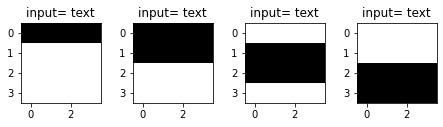

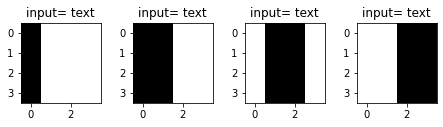

In [6]:
box_size=4
idx = range(box_size)
out1 = Line(line_position=idx, box_size=box_size, line_ori='x').get_image()
out2 = Line(line_position=idx, box_size=box_size, line_ori='y').get_image()

visualize_mat(out1, 
              label_text=np.arange(out1.size),
              num_col=8)
visualize_mat(out2,
              label_text=np.arange(out2.size),
              num_col=8)

In [7]:
torch.rand((5,5)).ndim

2

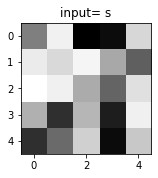

In [8]:
matx = torch.rand((5,5))
visualize_mat(matx, label_text='s')

In [9]:
np.arange(out1.size).shape

(64,)

In [10]:
box_siz = 16 # preferably of order 2
num_samples = 512 # preferably of order 2
half_box_siz = box_siz//2
box_siz = half_box_siz * 2 # updating box size (now it is not an odd number)

In [11]:
def func(num, divider):
    return num//divider + 1
l1 =  np.arange(num_samples//2)
l2 =  np.arange(num_samples//2)

In [12]:
l1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
l1//((num_samples//2)/box_siz)+1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12

In [14]:
int((num_samples//2)/box_siz)

16

In [15]:
torch.tensor(list(map(func, l1, [(num_samples//2)/box_siz]*(num_samples//2))))

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
         6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
         7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 1

In [16]:
# you can use each of the followings for seeing how random number of class samples or fix number of
# class samples might affect the results. one very import factor for training here is to 
# have equal number of samples in each class. Just uncomment the line and comment the other one.

# rand_radious = torch.randint(1, centralbox_size+1, (num_samples,)) # create a random array of raduis 
rand_radious1 = torch.tensor(list(map(func, l1, [(num_samples//2)/box_siz]*(num_samples//2))))
# rand_radious2 = torch.tensor(list(map(func, l2, [(num_samples)/half_box_siz]*(num_samples//2))))
# features1 = circle(radius=rand_radious1, box_size=box_siz)  # data set
features1 = torch.from_numpy(Line(line_position=rand_radious1, 
                                   box_size=box_siz, 
                                    line_ori='x').get_image())  # data set

rand_radious2 = torch.tensor(list(map(func, l2, [(num_samples//2)/box_siz]*(num_samples//2))))
# features2 = circle(radius=rand_radious2, box_size=box_siz)  # data set
features2 = torch.from_numpy(Line(line_position=rand_radious2, 
                                   box_size=box_siz, 
                                    line_ori='y').get_image())  # data set

In [17]:
features =  torch.cat((features1, features2), axis=0)

In [18]:
features.shape, features1.shape, features2.shape

(torch.Size([512, 16, 16]),
 torch.Size([256, 16, 16]),
 torch.Size([256, 16, 16]))

In [19]:
# rand_radious1 = torch.tensor([1]*(num_samples//2))
# rand_radious2 = torch.tensor([2]*(num_samples//2))
# rand_radious = torch.cat((rand_radious1, rand_radious2), axis=0)


# features = box(radius=rand_radious, box_size=box_siz)  # data set

In [20]:
rand_radious1

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,
         6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
         7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 1

In [21]:
half_box_siz


8

In [22]:
# torch.tensor(list(map(func, l1, [(num_samples//2)/half_box_siz]*(num_samples//2))))

In [23]:
features.shape

torch.Size([512, 16, 16])

In [24]:
features[0]

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [25]:
# rand_radious = torch.cat((rand_radious1, rand_radious2), axis=0)

In [26]:
# rand_radious.shape

In [27]:

# l2 =  np.arange(1,box_siz//2)

In [28]:
# rand_radious = torch.tensor(list(map(func, l1, [200//(box_siz//2)]*200)))

In [29]:
# rand_radious

In [30]:
#  np.unique(features, axis=0).shape

In [31]:
# select unique data samples only
# features = torch.from_numpy(np.unique(features, axis=0))#.shape

In [32]:
half_box_siz+1

9

In [33]:
# features.shape

In [34]:
# rand_radious

In [35]:
# rand_radious/rand_radious.max()

In [36]:
# rand_radious[10]/rand_radious.max()

In [37]:
features[10]

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [38]:
features.shape

torch.Size([512, 16, 16])

In [39]:
num_samples//2

256

In [40]:
# Code is 2d and the first col is designated to the first shape family. and the second is for subclass examples.

code = torch.zeros((num_samples, 6))

code[0             : num_samples//2, 0] = 1
code[num_samples//2: num_samples   , 0] = 0


code[0             : num_samples//2, 1] = 0
code[num_samples//2: num_samples   , 1] = 1


code[0             : num_samples//2, 2] = rand_radious1
code[num_samples//2: num_samples   , 2] = rand_radious2

code[0             : num_samples//2, 3] = rand_radious1
code[num_samples//2: num_samples   , 3] = rand_radious2

code[0             : num_samples//2, 4] = rand_radious1
code[num_samples//2: num_samples   , 4] = rand_radious2

code[0             : num_samples//2, 5] = rand_radious1
code[num_samples//2: num_samples   , 5] = rand_radious2

In [41]:
# code = torch.zeros((num_samples, 2))

# code[0             : num_samples//2, 0] = rand_radious1
# code[0             : num_samples//2, 1] = 0

# code[num_samples//2: num_samples   , 0] = 0
# code[num_samples//2: num_samples   , 1] = rand_radious2

In [42]:
code

tensor([[ 1.,  0.,  1.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  1.],
        [ 1.,  0.,  1.,  1.,  1.,  1.],
        ...,
        [ 0.,  1., 16., 16., 16., 16.],
        [ 0.,  1., 16., 16., 16., 16.],
        [ 0.,  1., 16., 16., 16., 16.]])

In [43]:
code.shape

torch.Size([512, 6])

In [44]:
torch.max(code, axis=0).values

tensor([ 1.,  1., 16., 16., 16., 16.])

In [45]:
code = code/torch.max(code, axis=0).values

In [46]:
torch.max(code, axis=0).values

tensor([1., 1., 1., 1., 1., 1.])

In [47]:
# random code
# code = torch.randint(1, 5, (features.shape[0],1))

In [48]:
# for i in range(features.shape[0]):
# code  = rand_radious/rand_radious.max()
    
#     print(rand_radious[i]/rand_radious.max() )
#     code [i, 0] = features[i].sum()
#     code [i, 1] = features[i].sum()

In [49]:
code.shape

torch.Size([512, 6])

In [50]:
# code[0:]

In [51]:
# features = features/features.shape[1]

In [52]:
features.shape[0]

512

In [53]:
# code  = code/code.max()

In [54]:
def add_pad(mat, pad_x=0, pad_y=0):
    assert(pad_x>=0 and pad_y>=0)
    pad_mat = torch.zeros(mat.shape[0]+2*pad_x, mat.shape[1]+2*pad_y)
    pad_mat[pad_x:mat.shape[0]+pad_x, pad_y:mat.shape[1]+pad_y] = mat
    return pad_mat

In [55]:
a = torch.randint(3, 10, (3, 3))
add_pad(a, 1, 1)

tensor([[0., 0., 0., 0., 0.],
        [0., 9., 3., 9., 0.],
        [0., 6., 5., 5., 0.],
        [0., 4., 8., 3., 0.],
        [0., 0., 0., 0., 0.]])

In [56]:
def conv(src_matices, filter_mat ):
    '''Works on 2d covn
       returns conv matrix of the same shape, with zero-padded 
       filter_mat shape must be (odd,odd)
    '''
    i_filt = filter_mat.shape[0]
    j_filt = filter_mat.shape[1]
    
    # if only one matrix is given, rather than a bunch
    if(src_matices.dim()==2):
        # add another dim in 0th
        src_matices = torch.unsqueeze(src_matices, dim=0)
     
    
    new_mat = torch.zeros(src_matices.shape)
    
    for idx, src_mat in enumerate(src_matices):
        padded_mat = add_pad(src_mat, i_filt//2, j_filt//2) 
        
        # print(new_mat.shape)

        for i in range(i_filt//2,padded_mat.shape[0]-i_filt//2):
            for j in range(i_filt//2,padded_mat.shape[1]-j_filt//2):

                    s= padded_mat[i-i_filt//2: i+i_filt//2+1, j-j_filt//2: j+j_filt//2+1 ]
                    # print()
                    new_mat[idx, i-i_filt//2,j-j_filt//2] =  (s.float()@torch.transpose(filter_mat.float(), 0, 1)).sum()/(filter_mat.shape[0]*filter_mat.shape[1])
                    
    return new_mat/torch.max(new_mat)    

In [57]:
a =  torch.randint(1,2, (3,3))
conv(features[0], a)

tensor([[[0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.3333, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3333],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000

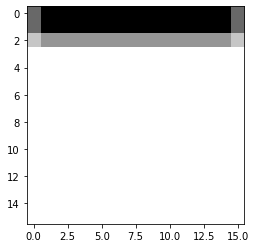

In [58]:
a = torch.randint(1, 3, (3, 3))
conv(features[0], a)
plt.imshow(conv(features[0], a)[0],cmap='Greys', interpolation='none')

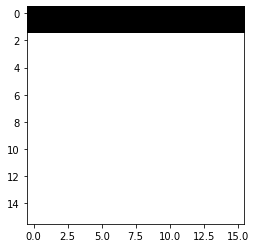

In [59]:
plt.imshow(features[0],cmap='Greys', interpolation='none')


In [60]:
conv(features[25], a)

tensor([[[0.3333, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3333],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.6667, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
          1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6667],
         [0.3333, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
          0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.3333],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000

In [61]:
features[0]

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [62]:
# filter_ = torch.randint(3, 10, (3, 3))
# conv(features[0], filter_)

In [63]:
 # torch.randint(3, 10, (3, 3))

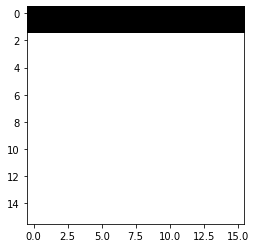

In [64]:
plt.imshow(features[0],cmap='Greys', interpolation='none')
# plt.axis('off');

In [65]:
features[0] .shape

torch.Size([16, 16])

In [66]:
temp_features = features

In [67]:
# apply conv filter on all dataset
# it lets you do average-pooling on data
filter_ = torch.randint(1, 5, (5, 5))
features = conv(features, filter_)

# plt.imshow(conv(features[0], a)[0],cmap='Greys', interpolation='none')

In [68]:
torch.randint(1, 5, (3, 3))

tensor([[1, 1, 4],
        [4, 3, 4],
        [3, 1, 4]])

In [69]:
# temp_features = features

In [70]:
temp_features.shape

torch.Size([512, 16, 16])

In [71]:
features[0]

tensor([[0.5103, 0.6621, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448,
         0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.6345, 0.4138],
        [0.5103, 0.6621, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448,
         0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.6345, 0.4138],
        [0.5103, 0.6621, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.7448,
         0.7448, 0.7448, 0.7448, 0.7448, 0.7448, 0.6345, 0.4138],
        [0.2552, 0.3310, 0.3724, 0.3724, 0.3724, 0.3724, 0.3724, 0.3724, 0.3724,
         0.3724, 0.3724, 0.3724, 0.3724, 0.3724, 0.3172, 0.2069],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.00

In [72]:
code.shape[1]

6

In [73]:
features = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2], 2+code.shape[1])
labels = torch.zeros(temp_features.shape[0]*temp_features.shape[1]* temp_features.shape[2])

In [74]:
features.shape

torch.Size([131072, 8])

In [75]:
# how cat function works?
x = torch.tensor([1,2,3])
torch.cat((x, x), axis=0)

tensor([1, 2, 3, 1, 2, 3])

In [76]:
(temp_features.shape[1])

16

In [77]:
#  building data set: first I needed to put all the cooridates (x, y) of pixels in rows of data set and add colums for its codes
count = 0 
for i in range(temp_features.shape[0]):
    for j in range(temp_features.shape[1]):
        for k in range(temp_features.shape[2]):
            features[count] = torch.cat((torch.tensor([j,k])/temp_features.shape[1],  torch.tensor(code[i])), axis=0)
            labels[count] = temp_features[i][j][k]
            count += 1
#             print(temp_features[i])


<ipython-input-77-ed4df0383927>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features[count] = torch.cat((torch.tensor([j,k])/temp_features.shape[1],  torch.tensor(code[i])), axis=0)


In [78]:
features.shape, labels.shape

(torch.Size([131072, 8]), torch.Size([131072]))

In [79]:
features[1065], labels[1065]

(tensor([0.1250, 0.5625, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625]),
 tensor(0.))

In [80]:
# for feature in features:
#     print(feature)
    


In [81]:
# labels[1450]

In [82]:
# from itertools import permutations
# for i,j, k  in permutations(range(0, 3)):
#     print(i,j,k)

In [83]:
# m = nn.LogSoftmax(dim=1)


In [84]:
input_dim = 2  # x, y poisitons of one pixel
hidden_dim = 40 # this one is so decisive

In [85]:
# defining dropout_layer
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # In this case, all elements are dropped out
    if dropout == 1:
        return torch.zeros_like(X)
    # In this case, all elements are kept
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [86]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        is_training = True
#         self.func1 = nn.Linear(input_dim + code.shape[1], hidden_dim)
        self.func1 = nn.Linear(input_dim + code.shape[1], hidden_dim)

        self.func2 = nn.Linear(hidden_dim, hidden_dim)
        self.func3 = nn.Linear(hidden_dim, hidden_dim)
        self.func4 = nn.Linear(hidden_dim, hidden_dim)
        self.func5 = nn.Linear(hidden_dim, 1)
        
        self.outp = nn.ReLU()
        
                
                
    def forward(self, x):
#         z = torch.cat((x, code_), axis=0)
        z = nn.functional.relu(self.func1(x.float()))
#         return self.outp(self.func5(z))
            # Use dropout only when training the model
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.080)
#         return self.outp(self.func5(z))    
        z = nn.functional.relu(self.func2(z.float()))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func3(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = nn.functional.relu(self.func4(z))
        
        if self.training == True:
            # Add a dropout layer after the first fully connected layer
            z = dropout_layer(z, dropout=0.10)
        
        z = self.func5(z)
#         z = self.func5(z)
        
        
        return self.outp(z)

In [87]:
model = Model()

In [88]:
a = torch.tensor([1,2,3, 4])
b = torch.tensor([1,2,3])

In [89]:
code[0]

tensor([1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625])

In [90]:
# features[1250]

In [91]:
model(features[1])

tensor([0.0414], grad_fn=<ReluBackward0>)

In [92]:
torch.cat((a, b), axis=0)

tensor([1, 2, 3, 4, 1, 2, 3])

In [93]:
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True): #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [94]:
# for i in range(features[0].shape[0]):
#     for j in range(features[0].shape[1]):
#         print(model(features[0][i][j]))

In [95]:
train_x = features[:-features.shape[0]*20//100]
test_x  = features[-features.shape[0]*20//100:]
train_y = labels[:-labels.shape[0]*20//100]
test_y  = labels[-labels.shape[0]*20//100:]

batch_size = test_x.shape[0]

print(f'train size= {train_x.shape}, test size= {test_x.shape}, batch size= {batch_size}')
print(f'train size= {train_y.shape}, test size= {test_y.shape}, batch size= {batch_size}')
train_loader = load_array((train_x, train_y), batch_size)
test_loader  = load_array((test_x, test_y), batch_size)

train size= torch.Size([104857, 8]), test size= torch.Size([26215, 8]), batch size= 26215
train size= torch.Size([104857]), test size= torch.Size([26215]), batch size= 26215


In [96]:
model.parameters()

<generator object Module.parameters at 0x7fc976ad8660>

In [97]:
# hyperparameters

lr = 2e-2

epochs = 300
DEVICE = 'cpu'
print_step = 50

In [98]:
# features[:-20].shape, features[-20:].shape

In [99]:
# we want to allow only 20% of data for test and the rest on training data
features.shape[0]*20//100

26214

In [100]:
# 80% for traning test, and 20% for test


In [101]:
train_x.shape, test_x.shape

(torch.Size([104857, 8]), torch.Size([26215, 8]))

# Defining loss function

In [102]:
def clamp(a, b):
#     a = torch.tensor(x)
#     b = torch.tensor(delta)
    return torch.min(b, torch.max(-b, a))

In [103]:
a = torch.tensor([-1, 5, 1.2, 2])
b = torch.tensor([1.2])
clamp(a, b)

tensor([-1.0000,  1.2000,  1.2000,  1.2000])

In [104]:
torch.max(b, a)

tensor([1.2000, 5.0000, 1.2000, 2.0000])

# Training

In [105]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

In [106]:
# torch.randn(3, 5).softmax(dim=1), torch.randn(3, 5)

In [107]:
# loss = nn.CrossEntropyLoss(reduction='none')
# def loss(y_hat, y):
#     return (y_hat-y).sum()
loss = nn.MSELoss()
# loss = nn.CrossEntropyLoss()
# loss = nn.BCEWithLogitsLoss()


In [108]:
# num_epochs = 30
# for epoch in range(num_epochs):
#     for X,Y in train_loader:
#     #     print(X,Y)
# #         x = X.T
# #         y = Y
#         print(X.shape,Y.shape, model(X.float()).shape)
#         l = loss(model(X.float())[:,0], Y.float())
#         optimizer.zero_grad()
#         l.backward()
#         optimizer.step() #optimizer
# #     l = loss(model(x_truth.float()), y_truth.float())
# #     print(f'epoch {epoch + 1}, loss {l:f}')

In [109]:
num_samples//2

256

In [110]:

print("Start training ...")
model.train()

for epoch in range(30):
    overall_loss = 0
    for batch_idx, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_hat = model(x.float()).float()
        ll = loss(y_hat.flatten(), y.float().flatten())
        overall_loss += ll.item()
        ll.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    print(overall_loss)
    
print("Finish!!")


Start training ...
	Epoch 1 complete! 	Average Loss:  8.732835891340927e-06
0.6867938786745071
	Epoch 2 complete! 	Average Loss:  5.829094195822158e-06
0.45842911303043365
	Epoch 3 complete! 	Average Loss:  5.532568856487362e-06
0.43510887771844864
	Epoch 4 complete! 	Average Loss:  5.497043195990417e-06
0.4323149621486664
	Epoch 5 complete! 	Average Loss:  5.471678916690566e-06
0.4303201884031296
	Epoch 6 complete! 	Average Loss:  5.400200616654774e-06
0.42469877749681473
	Epoch 7 complete! 	Average Loss:  5.305819585232538e-06
0.41727618128061295
	Epoch 8 complete! 	Average Loss:  5.195385676571991e-06
0.4085911065340042
	Epoch 9 complete! 	Average Loss:  5.112996626752143e-06
0.40211161971092224
	Epoch 10 complete! 	Average Loss:  4.911048992567337e-06
0.3862294480204582
	Epoch 11 complete! 	Average Loss:  4.626551445369173e-06
0.36385513842105865
	Epoch 12 complete! 	Average Loss:  4.714451812198699e-06
0.37076806277036667
	Epoch 13 complete! 	Average Loss:  4.577638424013535e-06
0

In [111]:
# for p in model.parameters():
#     print(p)

In [112]:
for m in model.named_children():
    print(m)

('func1', Linear(in_features=8, out_features=40, bias=True))
('func2', Linear(in_features=40, out_features=40, bias=True))
('func3', Linear(in_features=40, out_features=40, bias=True))
('func4', Linear(in_features=40, out_features=40, bias=True))
('func5', Linear(in_features=40, out_features=1, bias=True))
('outp', ReLU())


In [113]:
model.func1.weight.requires_grad = False
model.func1.bias.requires_grad = False

model.func2.weight.requires_grad = False
model.func2.bias.requires_grad = False

model.func3.weight.requires_grad = False
model.func3.bias.requires_grad = False

model.func4.weight.requires_grad = False
model.func4.bias.requires_grad = False

model.func5.weight.requires_grad = False
model.func5.bias.requires_grad = False


In [114]:
model.func1.weight.requires_grad

False

In [115]:
num_samples//2

256

In [116]:
torch.tensor(code [0], requires_grad=True)

<ipython-input-116-127521b8eb62>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(code [0], requires_grad=True)


tensor([1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625], requires_grad=True)

In [117]:
features[0].shape

torch.Size([8])

In [118]:
x = torch.tensor(features[0][:2])
codee = torch.tensor(code [0], requires_grad=True)
print(x.shape, codee.shape)
j = torch.cat((x, codee), axis=0)
j
model(j)

torch.Size([2]) torch.Size([6])


<ipython-input-118-91d5b2e7d1cb>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(features[0][:2])
<ipython-input-118-91d5b2e7d1cb>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  codee = torch.tensor(code [0], requires_grad=True)


tensor([1.0312], grad_fn=<ReluBackward0>)

In [119]:
model.parameters

<bound method Module.parameters of Model(
  (func1): Linear(in_features=8, out_features=40, bias=True)
  (func2): Linear(in_features=40, out_features=40, bias=True)
  (func3): Linear(in_features=40, out_features=40, bias=True)
  (func4): Linear(in_features=40, out_features=40, bias=True)
  (func5): Linear(in_features=40, out_features=1, bias=True)
  (outp): ReLU()
)>

In [120]:
features

tensor([[0.0000, 0.0000, 1.0000,  ..., 0.0625, 0.0625, 0.0625],
        [0.0000, 0.0625, 1.0000,  ..., 0.0625, 0.0625, 0.0625],
        [0.0000, 0.1250, 1.0000,  ..., 0.0625, 0.0625, 0.0625],
        ...,
        [0.9375, 0.8125, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.9375, 0.8750, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.9375, 0.9375, 0.0000,  ..., 1.0000, 1.0000, 1.0000]])

In [121]:
# code

In [122]:
(num_samples)/box_siz

32.0

In [123]:
features[0], features[124], features[250]

(tensor([0.0000, 0.0000, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625]),
 tensor([0.4375, 0.7500, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625]),
 tensor([0.9375, 0.6250, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625]))

In [124]:
step = int((num_samples//2)/box_siz)
num_distic_codes = step

In [125]:
step

16

In [126]:
optim_code = torch.empty(code.shape)
optim_code.shape

torch.Size([512, 6])

In [127]:
features[0:6]

tensor([[0.0000, 0.0000, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625],
        [0.0000, 0.0625, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625],
        [0.0000, 0.1250, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625],
        [0.0000, 0.1875, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625],
        [0.0000, 0.2500, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625],
        [0.0000, 0.3125, 1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625]])

In [128]:
step

16

In [129]:
for k in range(0, num_samples, step):
    # for each code
    codee = torch.tensor(code [k])#, requires_grad=True)      
    print('before:', codee)
    for epoch in range(100):
        overall_loss = 0
        # int((num_samples//2)/box_siz)
        for i in range(k, k+step):
            optimizer.zero_grad()
            xx = torch.tensor(features[i])
            x = xx.clone()
            # print(x.shape, codee.shape)
            # X = torch.cat((x, codee), axis=0)
            # X = torch.cat((features[i], codee))
            # X = torch.tensor(features[i], requires_grad=True)
            x[2:] = codee
            X = torch.tensor(x, 
                             requires_grad=True )
            # X = torch.tensor([x[0], x[1], codee[0], codee[1]], requires_grad=True )
            # print(features[i])
            # print(X.shape)
            # features[i].requires_grad = True
            y_hat = model(X.float()).float()
            l = loss(y_hat, labels[i].float())
            # print(l)
            overall_loss += l.item()
            l.backward()
            # print('x grad=',X.grad)
            # optimizer.step()
            # print(X.grad)
            # print(X)
            X = X -X.grad*0.02/100
            # print(X-features[i])
            codee = torch.tensor(X[2:], requires_grad=True )

            # print(features[i])
            # codee = torch.tensor([X[2], x[3]], requires_grad=True)
            # codee = X[2:3] # only one
            # print('*'*100)
        # print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
        # print(overall_loss)
    print('after:', codee)
    print('='*40)
    optim_code[k:k+step] = codee
print("Finish!!")

before: tensor([1.0000, 0.0000, 0.0625, 0.0625, 0.0625, 0.0625])


<ipython-input-129-a7cedc42854b>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  codee = torch.tensor(code [k])#, requires_grad=True)
<ipython-input-129-a7cedc42854b>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(features[i])
<ipython-input-129-a7cedc42854b>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(x,
/home/sobhan/miniconda3/envs/ml-dl/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([

after: tensor([1.0102, 0.0400, 0.0547, 0.0546, 0.0509, 0.0582], requires_grad=True)
before: tensor([1.0000, 0.0000, 0.1250, 0.1250, 0.1250, 0.1250])
after: tensor([1.0024, 0.0343, 0.1131, 0.1195, 0.1139, 0.1182], requires_grad=True)
before: tensor([1.0000, 0.0000, 0.1875, 0.1875, 0.1875, 0.1875])
after: tensor([ 0.9765, -0.1231,  0.2706,  0.2507,  0.2440,  0.2543],
       requires_grad=True)
before: tensor([1.0000, 0.0000, 0.2500, 0.2500, 0.2500, 0.2500])
after: tensor([ 0.9763, -0.1227,  0.3334,  0.3114,  0.3061,  0.3162],
       requires_grad=True)
before: tensor([1.0000, 0.0000, 0.3125, 0.3125, 0.3125, 0.3125])
after: tensor([ 0.9773, -0.1229,  0.3949,  0.3741,  0.3683,  0.3793],
       requires_grad=True)
before: tensor([1.0000, 0.0000, 0.3750, 0.3750, 0.3750, 0.3750])
after: tensor([ 0.9779, -0.1201,  0.4539,  0.4371,  0.4304,  0.4399],
       requires_grad=True)
before: tensor([1.0000, 0.0000, 0.4375, 0.4375, 0.4375, 0.4375])
after: tensor([ 0.9781, -0.1203,  0.5143,  0.4980,  0.

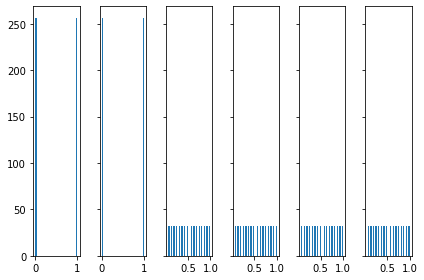

In [130]:
from matplotlib import pyplot
dif = code.detach().numpy()
fig, axs = plt.subplots(1, code.shape[1], sharey=True, tight_layout=True)
# We can set the number of bins with the *bins* keyword argument.
for idx in range(code.shape[1]):
    # _ = axs[0].hist(dif[:,0], bins=30)
    _ = axs[idx].hist(dif[:,idx], bins=num_distic_codes*2)

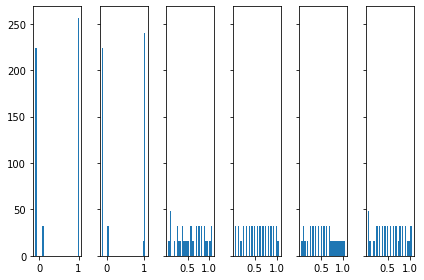

<Figure size 1080x864 with 0 Axes>

In [131]:
from matplotlib import pyplot
dif = optim_code.detach().numpy()
fig, axs = plt.subplots(1, optim_code.shape[1], sharey=True, tight_layout=True)
plt.figure(figsize=(15, 12))
for idx in range(optim_code.shape[1]):
    # _ = axs[0].hist(dif[:,0], bins=30)
    _ = axs[idx].hist(dif[:,idx], bins=num_distic_codes*2)

In [132]:
torch.min(optim_code, axis=0)

torch.return_types.min(
values=tensor([-0.1045, -0.1231,  0.0547,  0.0546,  0.0509,  0.0582],
       grad_fn=<MinBackward0>),
indices=tensor([480,  32,   0,   0,   0,   0]))

In [133]:
opt_min, _ = optim_code.min(axis=0)
opt_max, _ = optim_code.max(axis=0)

In [134]:
opt_min, opt_max

(tensor([-0.1045, -0.1231,  0.0547,  0.0546,  0.0509,  0.0582],
        grad_fn=<MinBackward0>),
 tensor([1.0102, 1.0306, 1.0630, 1.0329, 1.0460, 1.0434],
        grad_fn=<MaxBackward0>))

In [135]:
code.shape, optim_code.shape

(torch.Size([512, 6]), torch.Size([512, 6]))

In [136]:
num_samples//step

32

In [137]:
def generate_sample(model, code, size=(8 , 8)):
    count = 0
    if isinstance(code, np.ndarray):
        raise TypeError("This should of type tensor. Not np.ndarray!")
    if isinstance(code, list):
        code = torch.tensor(code)
    if code.ndim==1:
        code = code.reshape(1,-1)
    sample = torch.empty((code.shape[0], size[0] , size[1]))

    test_sample = torch.zeros((size[0] , size[1]))
 
    print(code.shape)
        
    for c in code:

        for i in range(size[0]):
            for j in range(size[1]):
                point_loc= torch.tensor([i/size[0], j/size[1]])
                test_sample [i,j] = model(torch.cat((point_loc, c)))

    
        sample[count] = test_sample#.flatten()
        count += 1
    return sample    

In [138]:
torch.tensor([1,2,2,3])

tensor([1, 2, 2, 3])

In [139]:
code[0].shape

torch.Size([6])

torch.Size([1, 6])


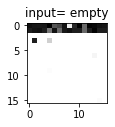

In [140]:
n_samples = generate_sample(model=model, 
                            code=code[0], 
                            size=(box_siz , box_siz))
visualize_mat(n_samples, num_col=8)

torch.Size([32, 6])


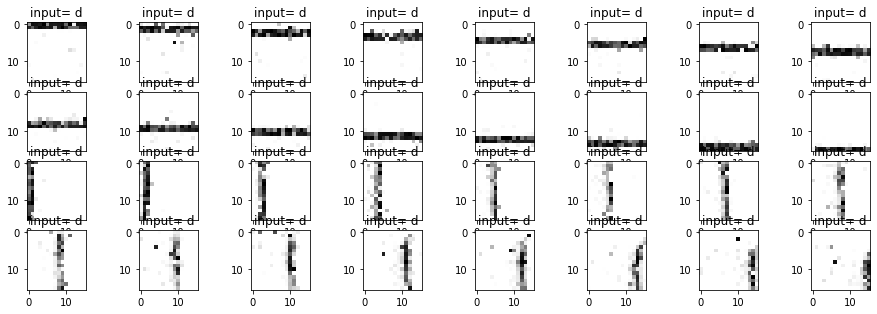

In [141]:
# fancy indexing. For all different possible codes (not repeated).
c = code[range(0, num_samples, step)]

n_samples = generate_sample(model=model, 
                            code=c, 
                            size=(box_siz , box_siz))
visualize_mat(n_samples, num_col=8, label_text='d')

torch.Size([32, 6])


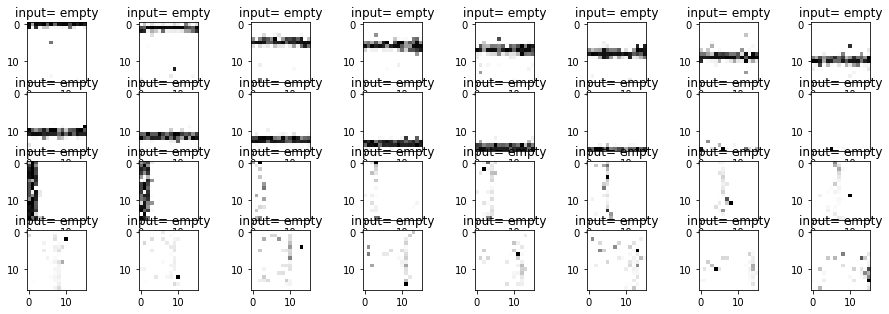

In [142]:
c = optim_code[range(0, num_samples, step)]
n_samples = generate_sample(model=model, 
                            code=c,
                            size=(box_siz , box_siz))
visualize_mat(n_samples, num_col=8)

In [143]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [144]:
size = (box_siz, box_siz)

In [145]:
def f(**code):

    c = torch.tensor([value for value in code.values()])
    test_sample = torch.zeros((size[0], size[1]))
    for i in range(box_siz):
        for j in range(box_siz):
            # with code
            point_loc= torch.tensor([i/size[0], j/size[1]])
            test_sample [i,j] = model(torch.cat((point_loc, c)))
            

            
    plt.subplot(211)
    plt.imshow(test_sample.detach().numpy(), cmap='Greys')
    # return np.sin(x)



In [146]:
inter_code = {
        'code1':(0.0, 1.0, 0.001), 
        'code2':(0.0, 1.0, 0.001), 
        'code3':(0.0, 1.0, 0.001),
        'code4':(0.0, 1.0, 0.001),
        'code5':(0.0, 1.0, 0.001),
        'code6':(0.0, 1.0, 0.001)
}

In [147]:

interact(f, **inter_code);



interactive(children=(FloatSlider(value=0.5, description='code1', max=1.0, step=0.001), FloatSlider(value=0.5,…

# Comments

In [148]:
# one hot for coding the main class is alot better experimentally.